In [5]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
ride_data_to_load = "ride_data.csv"
city_data_to_load = "city_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_city_ride = pd.merge(ride_data_df, city_data_df, how="left")

# Display the data table for preview
combined_city_ride.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

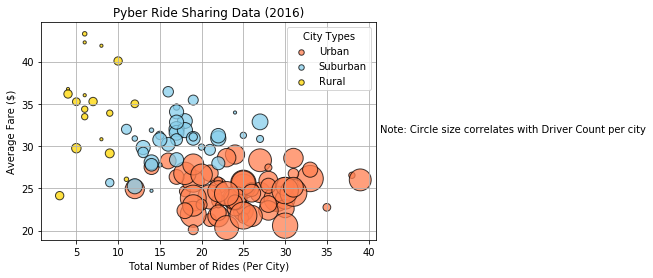

In [6]:
# Obtain the x and y coordinates for each of the three city types
#take merged data frame and find the values for Urban, Suburban and Rural in seperate data frames

urban_u = combined_city_ride.loc[combined_city_ride['type'] == 'Urban']
suburban_s = combined_city_ride.loc[combined_city_ride['type'] == 'Suburban']
rural_r = combined_city_ride.loc[combined_city_ride['type'] == 'Rural']

# urban (finding average fare, total number of rides and driver count)
urbancity = urban_u.groupby('city')
avg_fare_u = urbancity["fare"].mean()
total_rides_u = urbancity["ride_id"].count()
total_drivers_u = urbancity["driver_count"].mean()

# suburban (finding average fare, total number of rides and driver count)
suburbancity = suburban_s.groupby('city')
avg_fare_s = suburbancity["fare"].mean()
total_rides_s = suburbancity["ride_id"].count()
total_drivers_s = suburbancity["driver_count"].mean()

# rural (finding average fare, total number of rides and driver count)
ruralcity = rural_r.groupby('city')
avg_fare_r = ruralcity["fare"].mean()
total_rides_r = ruralcity["ride_id"].count()
total_drivers_r = ruralcity["driver_count"].mean()

# Building the scatter plots
Urban = plt.scatter(total_rides_u, avg_fare_u, marker="o", facecolors="coral", edgecolors="black", label = "Urban", s=(total_drivers_u)*10, alpha=.75)
Suburban = plt.scatter(total_rides_s, avg_fare_s, marker="o", facecolors="skyblue", edgecolors="black", label = "Suburban", s=(total_drivers_s)*10, alpha=.75)
Rural = plt.scatter(total_rides_r, avg_fare_r, marker="o", facecolors="gold", edgecolors="black", label = "Rural", s=(total_drivers_r)*10, alpha=.75)

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.grid()

# Create a legend
lgnd = plt.legend(title = 'City Types', handles=[Urban, Suburban, Rural], loc="best")

# Resizing the legend
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.figtext(.91, .5, "Note: Circle size correlates with Driver Count per city")
# Save Figure
plt.savefig("Pyber_Images/PyberData.png")

In [7]:
# Show plot
plt.show()

## Total Fares by City Type

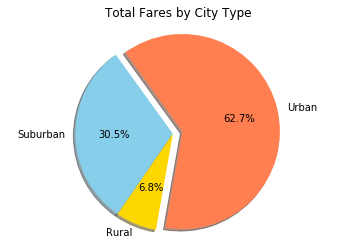

In [7]:
# Calculate Type Percents
sum_u = urban_u["fare"].sum()
sum_total = combined_city_ride["fare"].sum()
sum_total

u_percent = round((sum_u / sum_total)*100, 2)
u_percent

sum_s = suburban_s["fare"].sum()
s_percent = round((sum_s / sum_total)*100, 2)
s_percent

sum_r = rural_r["fare"].sum()
r_percent = round((sum_r / sum_total)*100, 2)
r_percent

# pie chart attributes
labels = ["Urban", "Suburban", "Rural"]

sizes = [u_percent, s_percent, r_percent]

colors = ["coral", "skyblue", "gold"]

explode = (.1, 0, 0)

# create pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=260)

# add title and make sure that the axises are equal
plt.title("Total Fares by City Type")
plt.axis("equal")

# Save Figure
plt.savefig("Pyber_Images/TotalFares.png")

## Total Rides by City Type

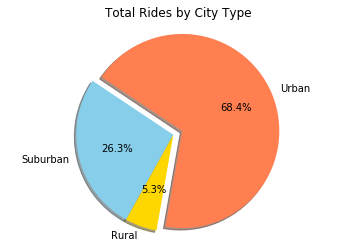

In [8]:
# Calculate Ride Percents

# urban ride percents
count_u_r = urban_u["ride_id"].count()
count_total_r = combined_city_ride["ride_id"].count()
count_total_r

u_r_percent = round((count_u_r / count_total_r)*100, 1)
u_r_percent

# suburban ride percents
count_s_r = suburban_s["ride_id"].count()
s_r_percent = round((count_s_r / count_total_r)*100, 1)
s_r_percent

# rural ride percents
count_r_r = rural_r["ride_id"].count()
r_r_percent = round((count_r_r / count_total_r)*100, 1)
r_r_percent

# pie chart attributes
labels = ["Urban", "Suburban", "Rural"]

sizes = [u_r_percent, s_r_percent, r_r_percent]

colors = ["coral", "skyblue", "gold"]

explode = (.1, 0, 0)

# create pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=260)

# add title and make sure that the axises are equal
plt.title("Total Rides by City Type")
plt.axis("equal")

# Save Figure
plt.savefig("Pyber_Images/TotalRides.png")

## Total Drivers by City Type

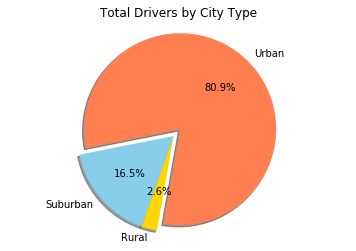

In [9]:
# Calculate Driver Percents

# urban driver percents

u_driver = urban_u[["city", "driver_count"]]
total_driver = combined_city_ride[["city", "driver_count"]]
u_driver_1 = u_driver.drop_duplicates()
total_driver_1 = total_driver.drop_duplicates()

sum_u_d = u_driver_1["driver_count"].sum()
sum_total_d = total_driver_1["driver_count"].sum()

u_d_percent = round((sum_u_d / sum_total_d)*100, 1)
u_d_percent

# suburban driver percents

s_driver = suburban_s[["city", "driver_count"]]
s_driver_1 = s_driver.drop_duplicates()

sum_s_d = s_driver_1["driver_count"].sum()
sum_total_d = total_driver_1["driver_count"].sum()

s_d_percent = round((sum_s_d / sum_total_d)*100, 1)
s_d_percent

# rural driver percents

r_driver = rural_r[["city", "driver_count"]]
r_driver_1 = r_driver.drop_duplicates()

sum_r_d = r_driver_1["driver_count"].sum()
sum_total_d = total_driver_1["driver_count"].sum()

r_d_percent = round((sum_r_d / sum_total_d)*100, 1)
r_d_percent

# attributes of the pie chart
labels = ["Urban", "Suburban", "Rural"]

sizes = [u_d_percent, s_d_percent, r_d_percent]

colors = ["coral", "skyblue", "gold"]

explode = (.1, 0, 0)

# create pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=260)

# add title and make sure that the axises are equal
plt.title("Total Drivers by City Type")
plt.axis("equal")

# Save Figure
plt.savefig("Pyber_Images/TotalDrivers.png")